In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/house-prices-st-louis-county-mo-from-redfin/sales4.csv
/kaggle/input/house-prices-st-louis-county-mo-from-redfin/sales3.csv
/kaggle/input/house-prices-st-louis-county-mo-from-redfin/sales5.csv
/kaggle/input/house-prices-st-louis-county-mo-from-redfin/sales2.csv
/kaggle/input/house-prices-st-louis-county-mo-from-redfin/sales1.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
file_names = ['sales1.csv', 'sales2.csv', 'sales3.csv', 'sales4.csv', 'sales5.csv']

In [4]:
# Initialize an empty DataFrame
df = pd.DataFrame()

In [5]:
# Loop through the file names and read each CSV file
for file_name in file_names:
    #df = pd.read_csv('/kaggle/input/house-prices-st-louis-county-mo-from-redfin/'+file_name)
    df = pd.concat([df, pd.read_csv('/kaggle/input/house-prices-st-louis-county-mo-from-redfin/'+file_name)], ignore_index=True)
    

In [6]:
df.shape

(1603, 27)

In [7]:
df.head()

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,...,STATUS,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE
0,PAST SALE,April-15-2020,Vacant Land,19299 Puellman Rd,Wildwood,MO,63005,399900.0,NaN,NaN,...,Sold,NaN,NaN,https://www.redfin.com/MO/Wildwood/19299-Puell...,MARIS,20021725.0,N,Y,38.622144,-90.731973
1,PAST SALE,NaN,Single Family Residential,16252 Windfall Ridge Ct,Chesterfield,MO,63005,NaN,3.0,2.5,...,Sold,NaN,NaN,https://www.redfin.com/MO/Chesterfield/16252-W...,MARIS,NaN,N,Y,38.633559,-90.577637
2,PAST SALE,August-16-2022,Condo/Co-op,14300 Conway Meadows Ct #308,St Louis,MO,63005,325000.0,3.0,2.0,...,Sold,NaN,NaN,https://www.redfin.com/MO/St-Louis/14300-Conwa...,MARIS,23002092.0,N,Y,38.629945,-90.696285
3,PAST SALE,February-7-2020,Single Family Residential,16853 Chesterfield Blfs,Chesterfield,MO,63005,438000.0,2.0,2.5,...,Sold,NaN,NaN,https://www.redfin.com/MO/Chesterfield/16853-C...,MARIS,20017928.0,N,Y,38.663775,-90.584643
4,PAST SALE,NaN,Single Family Residential,2517 Pepperfield Ct,Wildwood,MO,63005,437000.0,3.0,3.0,...,NaN,NaN,NaN,https://www.redfin.com/MO/Wildwood/2517-Pepper...,NaN,NaN,N,Y,38.614967,-90.611794


In [8]:
col_to_drop = ['SALE TYPE','ADDRESS','CITY','SOLD DATE','STATE OR PROVINCE','ZIP OR POSTAL CODE','LOCATION','DAYS ON MARKET','STATUS', 'NEXT OPEN HOUSE START TIME',
       'NEXT OPEN HOUSE END TIME','URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)','SOURCE','MLS#','FAVORITE','INTERESTED']

In [9]:
df.shape

(1603, 27)

In [10]:
df.columns

Index(['SALE TYPE', 'SOLD DATE', 'PROPERTY TYPE', 'ADDRESS', 'CITY',
       'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'PRICE', 'BEDS', 'BATHS',
       'LOCATION', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'DAYS ON MARKET',
       '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME',
       'NEXT OPEN HOUSE END TIME',
       'URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)',
       'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [11]:
count_z = df[df['ZIP OR POSTAL CODE']==63305].count()

In [12]:
count_z['ZIP OR POSTAL CODE']

2

In [13]:
incorrect_zip_rows = df[df['ZIP OR POSTAL CODE'] == 63305]

In [14]:
print(incorrect_zip_rows[['ADDRESS', 'ZIP OR POSTAL CODE']])

                           ADDRESS  ZIP OR POSTAL CODE
332              109 Chippenham Ln               63305
1311  16945 Lake Meadow Dr Lot 210               63305


In [15]:
df_ = df.drop(columns=col_to_drop, inplace=False)

In [16]:
df_['PROPERTY TYPE'].unique()

array(['Vacant Land', 'Single Family Residential', 'Condo/Co-op'],
      dtype=object)

In [17]:
df_.isnull().sum()

PROPERTY TYPE      0
PRICE              7
BEDS              49
BATHS             54
SQUARE FEET       51
LOT SIZE          39
YEAR BUILT       155
$/SQUARE FEET     58
HOA/MONTH        497
LATITUDE           0
LONGITUDE          0
dtype: int64

In [18]:
#percent_missing in each column
percent = df_.isnull().sum() * 100 / len(df_)
missing_value_percent = pd.DataFrame({'column_name': df_.columns, 'percent_missing': percent})
print(missing_value_percent.max())


column_name        YEAR BUILT
percent_missing     31.004367
dtype: object


In [19]:
len(df_)

1603

In [20]:
percent

PROPERTY TYPE     0.000000
PRICE             0.436681
BEDS              3.056769
BATHS             3.368684
SQUARE FEET       3.181535
LOT SIZE          2.432938
YEAR BUILT        9.669370
$/SQUARE FEET     3.618216
HOA/MONTH        31.004367
LATITUDE          0.000000
LONGITUDE         0.000000
dtype: float64

In [21]:
missing_value_percent

,column_name,percent_missing
PROPERTY TYPE,PROPERTY TYPE,0.000000
PRICE,PRICE,0.436681
BEDS,BEDS,3.056769
BATHS,BATHS,3.368684
SQUARE FEET,SQUARE FEET,3.181535
LOT SIZE,LOT SIZE,2.432938
YEAR BUILT,YEAR BUILT,9.669370
$/SQUARE FEET,$/SQUARE FEET,3.618216
HOA/MONTH,HOA/MONTH,31.004367
LATITUDE,LATITUDE,0.000000


Now plotting missing values

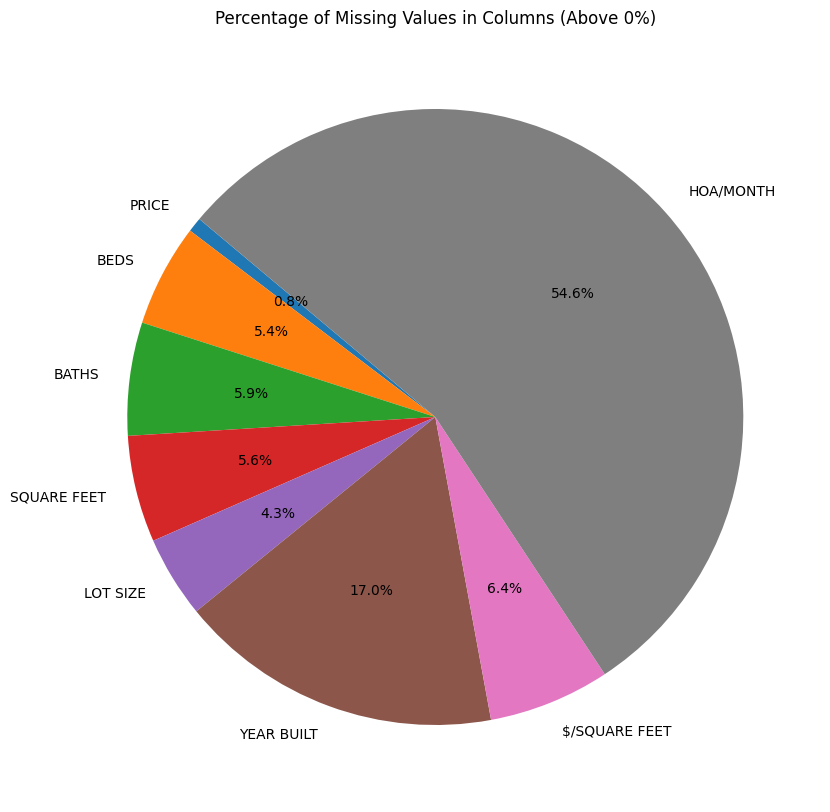

In [22]:
non_zero_indices = percent > 0
filtered_percent = percent[non_zero_indices]
filtered_labels = missing_value_percent.index[non_zero_indices]

plt.figure(figsize=(10, 10))  # Adjust the figure size as needed

# Create the pie chart with labels outside the pie
plt.pie(filtered_percent, labels=filtered_labels, autopct='%1.1f%%', startangle=140, labeldistance=1.1)

plt.title('Percentage of Missing Values in Columns (Above 0%)')

plt.show()

In [23]:
#investigate colmn price and see what other columns have missing values
rows_with_nan = df_[df_['PRICE'].isnull()]

In [24]:
rows_with_nan

,PROPERTY TYPE,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,$/SQUARE FEET,HOA/MONTH,LATITUDE,LONGITUDE
1,Single Family Residential,NaN,3.0,2.5,2192.0,14375.0,1982.0,NaN,NaN,38.633559,-90.577637
404,Condo/Co-op,NaN,4.0,3.5,2972.0,7405.0,1999.0,NaN,NaN,38.656969,-90.582148
438,Single Family Residential,NaN,3.0,3.0,2192.0,27878.0,1986.0,NaN,NaN,38.641406,-90.573127
952,Single Family Residential,NaN,4.0,4.5,3114.0,12632.0,1990.0,NaN,NaN,38.642207,-90.576861
1096,Single Family Residential,NaN,4.0,4.5,4398.0,73616.0,2004.0,NaN,NaN,38.642570,-90.677694
1177,Single Family Residential,NaN,4.0,3.5,2675.0,131987.0,1978.0,NaN,NaN,38.638238,-90.596552
1575,Single Family Residential,NaN,4.0,5.0,5690.0,15028.0,2008.0,NaN,NaN,38.655130,-90.577027


These rows include price, square feet of the single family home,HOA and location. 

In [25]:
df_.to_csv('/kaggle/working/output_file.csv', index=False)

In [26]:
#removing all properties other than single family homes
single_family_homes = df_[df_['PROPERTY TYPE'] == 'Single Family Residential']


In [27]:
single_family_homes = single_family_homes.drop("PROPERTY TYPE", axis=1)

In [28]:
single_family_homes.isna().sum()

PRICE              6
BEDS               0
BATHS              5
SQUARE FEET        3
LOT SIZE          38
YEAR BUILT       104
$/SQUARE FEET      9
HOA/MONTH        459
LATITUDE           0
LONGITUDE          0
dtype: int64

In [29]:
rows_with_missing_baths = single_family_homes[single_family_homes['BATHS'].isnull()]
print(rows_with_missing_baths)

          PRICE  BEDS  BATHS  SQUARE FEET  LOT SIZE  YEAR BUILT  \
145    149900.0   0.0    NaN       1164.0   29316.0         NaN   
1277   949000.0   0.0    NaN       4000.0       NaN         NaN   
1304   949000.0   0.0    NaN       4000.0       NaN         NaN   
1308   949000.0   0.0    NaN       4000.0       NaN         NaN   
1470  1055600.0   0.0    NaN       4000.0       NaN         NaN   

      $/SQUARE FEET  HOA/MONTH   LATITUDE  LONGITUDE  
145           129.0        NaN  38.641951 -90.671504  
1277          237.0        NaN  38.660613 -90.596527  
1304          237.0        NaN  38.659177 -90.603136  
1308          237.0        NaN  38.657474 -90.599733  
1470          264.0        NaN  38.658871 -90.603102  


In [30]:

price_mean = single_family_homes['PRICE'].mean()
bath_median = single_family_homes['BATHS'].median()
year_median = single_family_homes['YEAR BUILT'].median()
hoa_mean = single_family_homes['HOA/MONTH'].mean()
lot_mean = single_family_homes['LOT SIZE'].mean()
sft_mean = single_family_homes['SQUARE FEET'].mean()

In [31]:
single_family_homes['PRICE'].fillna(price_mean, inplace=True)
single_family_homes['BATHS'].fillna(bath_median, inplace=True)
single_family_homes['YEAR BUILT'].fillna(year_median, inplace=True)
single_family_homes['HOA/MONTH'].fillna(hoa_mean, inplace=True)
single_family_homes['LOT SIZE'].fillna(lot_mean,inplace=True)
single_family_homes['SQUARE FEET'].fillna(sft_mean, inplace=True)

/tmp/ipykernel_18/4143689653.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  single_family_homes['PRICE'].fillna(price_mean, inplace=True)
/tmp/ipykernel_18/4143689653.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

In [32]:
mask_missing_values = single_family_homes['$/SQUARE FEET'].isnull()

# Calculate missing values only for rows where '$/SQUARE FEET' is missing
single_family_homes.loc[mask_missing_values, '$/SQUARE FEET'] = (
    single_family_homes['PRICE'] / single_family_homes['SQUARE FEET']
)

In [33]:
# Check for infinite values in the entire DataFrame
has_infinite_values = any(single_family_homes[col].isin([np.inf, -np.inf]).any() for col in single_family_homes.columns)

# Check if there are any infinite values in the DataFrame
if has_infinite_values:
    print("There are infinite values in the DataFrame.")
else:
    print("There are no infinite values in the DataFrame.")

There are no infinite values in the DataFrame.


In [34]:
single_family_homes.describe()

,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,$/SQUARE FEET,HOA/MONTH,LATITUDE,LONGITUDE
count,1.483000e+03,1483.000000,1483.000000,1483.000000,1.483000e+03,1483.000000,1483.000000,1483.000000,1483.000000,1483.000000
mean,7.410513e+05,4.319622,3.909980,4363.781081,5.167702e+04,1992.036413,170.558498,66.851562,38.638664,-90.616197
std,3.731223e+05,0.803375,1.017138,1451.760694,1.077256e+05,13.367232,49.575648,60.398382,0.016900,0.031535
min,1.908500e+04,0.000000,1.000000,864.000000,1.612000e+03,1850.000000,7.000000,4.000000,38.590057,-90.731814
25%,5.290000e+05,4.000000,3.500000,3389.000000,1.916600e+04,1986.000000,138.000000,42.000000,38.627358,-90.636417
50%,6.500000e+05,4.000000,3.500000,4172.000000,2.700700e+04,1994.000000,161.000000,66.851562,38.640612,-90.606410
75%,8.362500e+05,5.000000,4.500000,5200.000000,4.922300e+04,1998.000000,194.000000,67.000000,38.653524,-90.591855
max,5.850000e+06,9.000000,9.500000,13782.000000,3.360480e+06,2022.000000,650.000000,1100.000000,38.663839,-90.572572


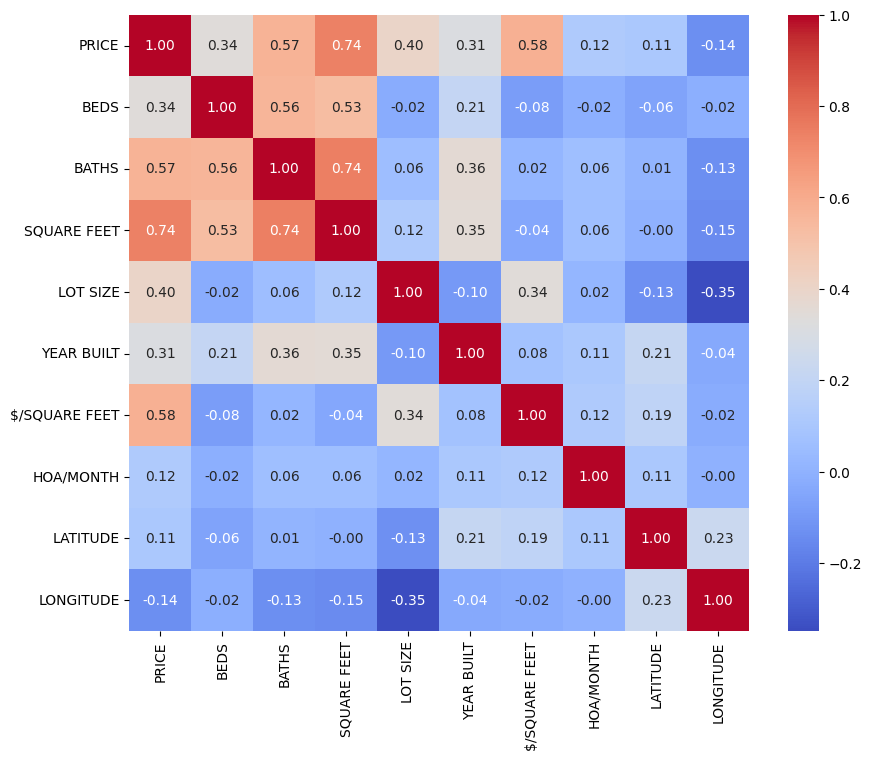

In [35]:
# Calculate the correlation matrix
correlation_matrix = single_family_homes.corr()
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

<Axes: xlabel='LONGITUDE', ylabel='LATITUDE'>

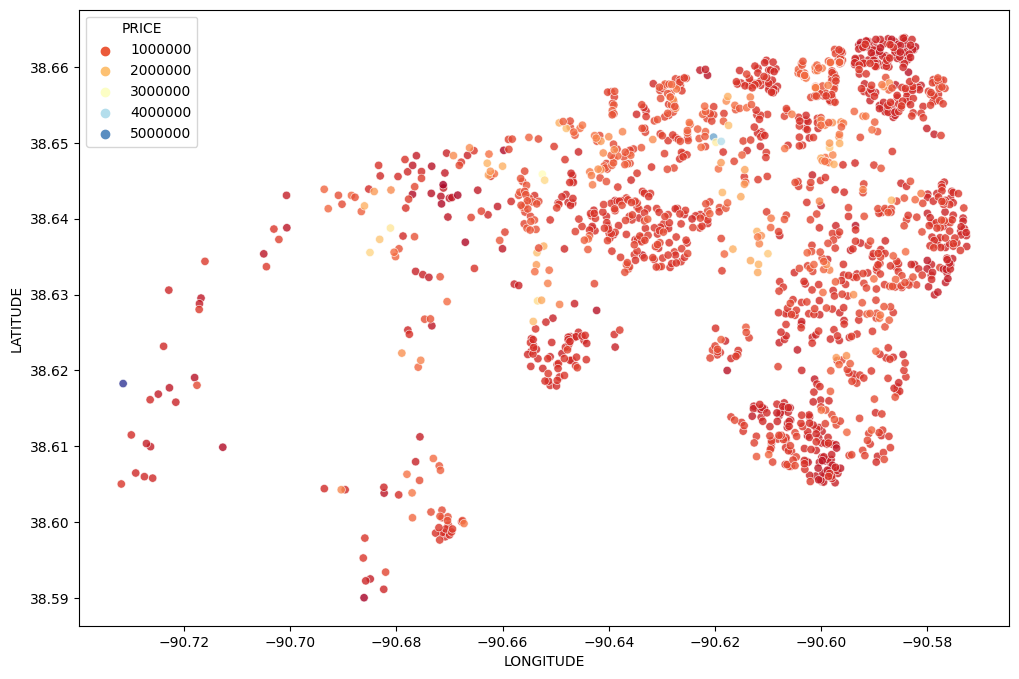

In [36]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='LONGITUDE',y='LATITUDE',data =single_family_homes,alpha=0.8,palette='RdYlBu',hue = 'PRICE')

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [38]:
single_family_homes.columns

Index(['PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT',
       '$/SQUARE FEET', 'HOA/MONTH', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [39]:
single_family_homes.shape

(1483, 10)

In [40]:
X = single_family_homes[['BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT',
       '$/SQUARE FEET', 'HOA/MONTH', 'LATITUDE', 'LONGITUDE']]
y = single_family_homes['PRICE']

In [41]:
X.isna().sum()

BEDS             0
BATHS            0
SQUARE FEET      0
LOT SIZE         0
YEAR BUILT       0
$/SQUARE FEET    0
HOA/MONTH        0
LATITUDE         0
LONGITUDE        0
dtype: int64

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [43]:
scaler = MinMaxScaler()

In [44]:
X_train_scaled = scaler.fit_transform(X_train)

In [45]:
X_test_scaled = scaler.transform(X_test)

In [46]:
lm = LinearRegression()

In [47]:
lm.fit(X_train_scaled,y_train)

LinearRegression()

In [48]:
lm.coef_

array([ -71330.88367662,  -39263.70191373, 2564538.15843974,
       1618817.18808682,   92268.17164558, 2757076.24550333,
         38639.36923873,   10972.87294286,   68224.2546401 ])

In [49]:
predictions = lm.predict(X_test_scaled)

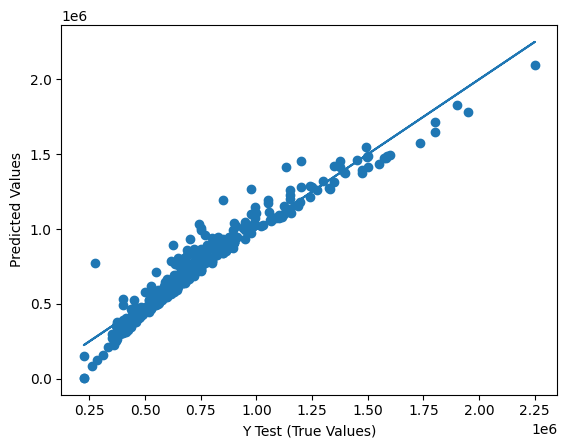

In [50]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted Values')
plt.plot(y_test,y_test)

In [51]:
print('MAE',metrics.mean_absolute_error(y_test,predictions))
print('MSE',metrics.mean_squared_error(y_test,predictions))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE 52225.13358705729
MSE 5867579597.96759
RMSE 76600.12792396362


In [52]:
metrics.explained_variance_score(y_test,predictions)

0.9323190013223446

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


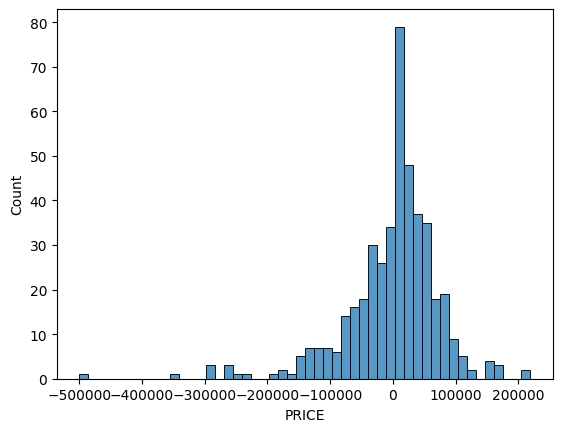

In [53]:
sns.histplot((y_test-predictions),bins=50);

In [54]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coeff']) #coefficient shows increase in money spent

In [55]:
cdf

,Coeff
BEDS,-7.133088e+04
BATHS,-3.926370e+04
SQUARE FEET,2.564538e+06
LOT SIZE,1.618817e+06
YEAR BUILT,9.226817e+04
$/SQUARE FEET,2.757076e+06
HOA/MONTH,3.863937e+04
LATITUDE,1.097287e+04
LONGITUDE,6.822425e+04


In [56]:
single_house = X_test.iloc[0]

In [57]:
single_house = scaler.transform(single_house.values.reshape(-1, 9))

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [58]:
single_house

array([[0.55555556, 0.41176471, 0.58802433, 0.02545739, 0.84302326,
        0.20839813, 0.05734632, 0.54507221, 0.82952912]])

In [59]:
lm.predict(single_house)

array([1457607.27674624])

In [60]:
y_test[1]

741051.3141503046

In [61]:
my_house = np.array([5 , 3.5, 3378, 22216, 1996, 207, 100, 38.642033, -90.647284])

In [62]:
myhousedf = pd.DataFrame(my_house)

In [63]:
my_house = scaler.transform(myhousedf.values.reshape(-1, 9))

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [64]:
lm.predict(my_house)

array([673212.30206148])

# Random Forest Regressor

In [65]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import explained_variance_score

In [66]:
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train_scaled,y_train)

RandomForestRegressor(random_state=42)

In [67]:
feature_importance = model_rf.feature_importances_

In [68]:
# Display feature importance
for feature, importance in zip(X.columns, feature_importance):
    print(f"{feature}: {importance}")

BEDS: 0.002086351762139519
BATHS: 0.00431349869404857
SQUARE FEET: 0.5899864647917304
LOT SIZE: 0.006899332451985155
YEAR BUILT: 0.0035682047607325626
$/SQUARE FEET: 0.375454335831735
HOA/MONTH: 0.0013256167107241806
LATITUDE: 0.00373238036364489
LONGITUDE: 0.012633814633259787


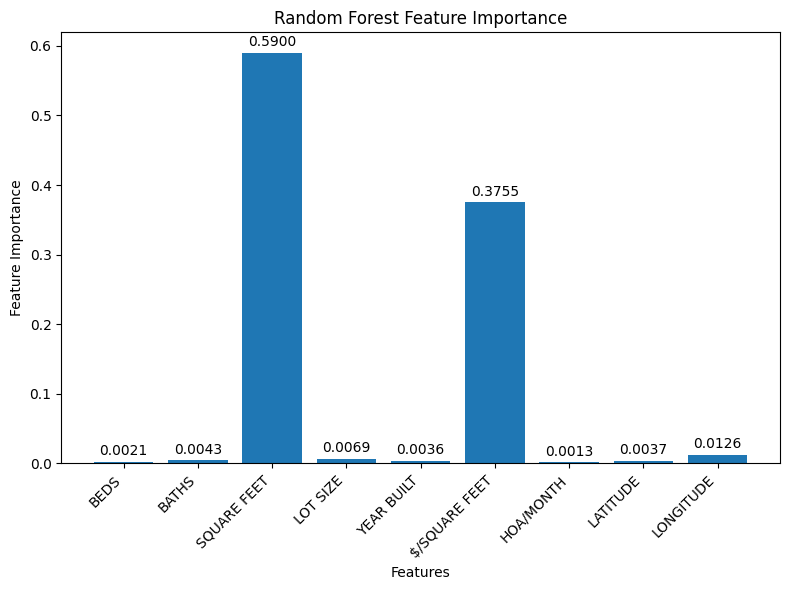

In [69]:
plt.figure(figsize=(8, 6))
plt.bar(X.columns, feature_importance)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Random Forest Feature Importance')
for i, v in enumerate(feature_importance):
    plt.text(i, v + 0.005, f'{v:.4f}', ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [70]:
# Evaluate Random Forest model on the same test set
y_pred_rf = model_rf.predict(X_test_scaled)

In [71]:
# Calculate Mean Absolute Error (MAE)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f"Random Forest MAE on Test Set: {mae_rf}")

# Calculate Mean Squared Error (MSE)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest MSE on Test Set: {mse_rf}")

# Calculate Root Mean Squared Error (RMSE)
rmse_rf = np.sqrt(mse_rf)
print(f"Random Forest RMSE on Test Set: {rmse_rf}")

Random Forest MAE on Test Set: 12661.10202393251
Random Forest MSE on Test Set: 676351387.9812813
Random Forest RMSE on Test Set: 26006.75658326661


In [72]:
# Calculate Explained Variance Score
explained_var_score_rf = explained_variance_score(y_test, y_pred_rf)
print(f"Random Forest Explained Variance Score on Test Set: {explained_var_score_rf}")

Random Forest Explained Variance Score on Test Set: 0.9922139245594761


Explained Variance Score=1− (Variance of True Values/Variance of Residuals)
Random Forest Regression has a better explainef variance compared to linear regression.

* Feature Importance: Square footage (SQUARE FEET) is the most influential feature in predicting house prices, contributing significantly (0.59) to the Random Forest model.
* 
* $/SQUARE FEET Impact: The cost per square foot ($/SQUARE FEET) is also substantial (0.38), indicating that the price per unit area plays a crucial role in predicting house prices.
* 
* Geographical Features: Latitude and longitude (LATITUDE and LONGITUDE) are less impactful individually, but together they contribute significantly (0.016) to the Random Forest model.
* 
* Linear Regression Performance: Linear regression achieves a substantial explained variance of 0.93, indicating strong predictive power.
* 
* Random Forest Performance: Random Forest outperforms linear regression with an impressive explained variance of 0.99, showcasing its ability to capture complex relationships in the data.
* 
* Model Consistency: The consistency of Random Forest across different subsets of data is reflected in its high explained variance score.
* 
* Variance Explanation: Random Forest explains 99% of the variance in house prices, suggesting that it effectively captures the patterns in the target variable.
* 
* Key Drivers: Square footage and price per square foot emerge as key drivers in determining house prices.
* 
* Geographical Influence: Latitude and longitude, while individually less influential, collectively contribute to the predictive power of the Random Forest model.

The Random Forest model, with its superior performance and robust feature importance, demonstrates its effectiveness in predicting house prices, providing a valuable alternative to traditional linear regression.